In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
import sklearn
import numpy as np
from scipy import stats
import time
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Get Data
Tracklist Spotify with metrics by song
- https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [24]:
df = pd.read_csv('data/SpotifyFeatures.csv')
tracks = pd.read_csv('data/tracks.csv')
df = df.merge(tracks[['id', 'release_date']], left_on='track_id', right_on='id', how='inner')
df['release_date'] = df['release_date'].astype(str).str[:4]

In [25]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id,release_date
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2YegxR5As7BeQuVp2U6pek,2005
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2YegxR5As7BeQuVp2U6pek,2005
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2YegxR5As7BeQuVp2U6pek,2005
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2YegxR5As7BeQuVp2U6pek,2005
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,0.0,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2YegxR5As7BeQuVp2U6pek,2005


### Metrics
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [26]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,52452.000000,52452.000000,52452.000000,5.245200e+04,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000
mean,54.915161,0.283111,0.582826,2.448303e+05,0.611515,0.084331,0.191815,-8.603458,0.084606,119.071824,0.522593
std,13.231837,0.307740,0.167866,8.764578e+04,0.237065,0.228735,0.162296,4.918754,0.090449,29.795783,0.248094
min,0.000000,0.000001,0.059800,3.268000e+04,0.000707,0.000000,0.009670,-47.046000,0.022400,31.988000,0.022100
25%,46.000000,0.026100,0.474000,1.979870e+05,0.455000,0.000000,0.093700,-10.647000,0.034700,95.055000,0.327000
50%,56.000000,0.152000,0.594000,2.314930e+05,0.643000,0.000021,0.125000,-7.347000,0.046900,117.010000,0.529000
75%,64.000000,0.479000,0.706000,2.739730e+05,0.803000,0.004590,0.241000,-5.260000,0.087800,138.064000,0.723000
max,99.000000,0.996000,0.986000,3.650688e+06,0.999000,0.999000,1.000000,3.744000,0.957000,242.903000,0.992000


## Plots
https://www.python-graph-gallery.com

## Año de lanzamiento

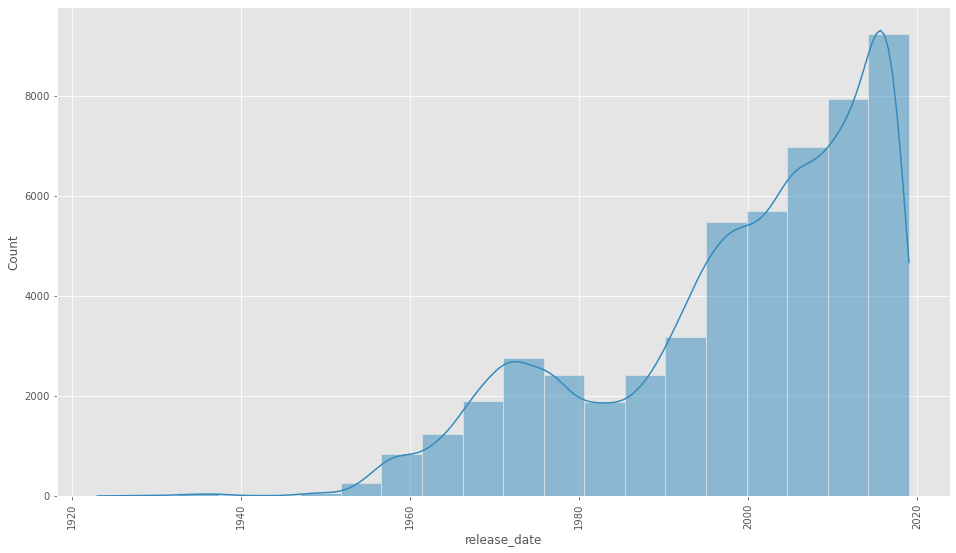

In [27]:
import matplotlib.pyplot as plt
ages = df.sort_values(by='release_date')
ages['release_date']=ages['release_date'].astype(int)
g = sns.histplot(ages.release_date, kde=True, bins=20)
plt.xticks(rotation=90)
plt.show()

/var/folders/xb/bbh7l4cn5gn53m55kwsnm_680000gn/T/ipykernel_49158/4169610684.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[columns_num].corr(), dtype=np.bool))


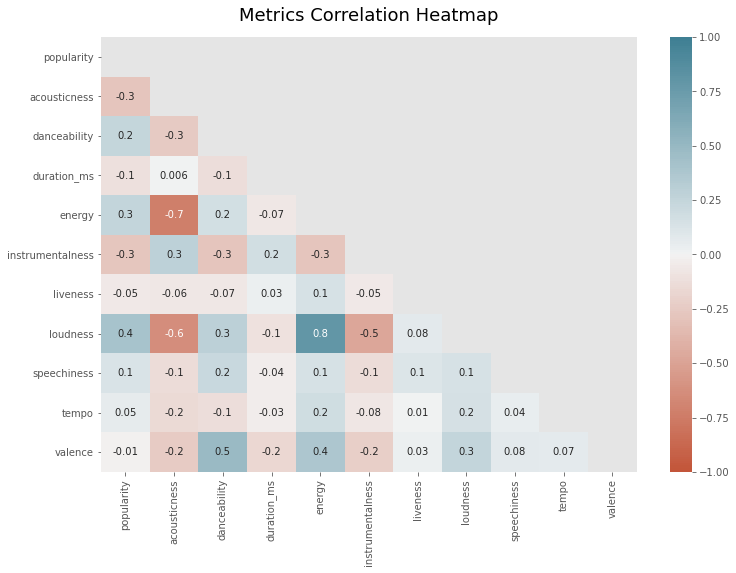

In [28]:
plt.figure(figsize=(12, 8))
columns_num = df.dtypes[df.dtypes != "object"].index
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df[columns_num].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[columns_num].corr(), mask=mask, vmin=-1, vmax=1, annot = True, fmt = '.1g', cmap=sns.diverging_palette(20, 220, n=200))
heatmap.set_title('Metrics Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

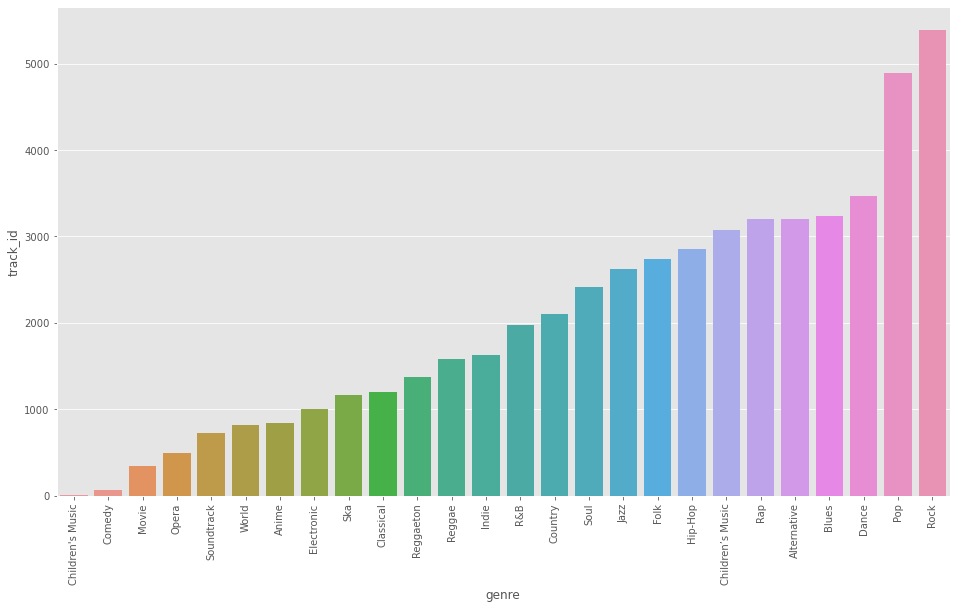

In [29]:
generos = df.groupby(['genre'])['track_id'].count().reset_index()
generos = generos.sort_values(by='track_id')
g = sns.barplot(data=generos, x='genre', y='track_id')
plt.xticks(rotation=90)
plt.show()

## Definimos filtros
Solo a modo explicativo y para simplificar el caso nos quedamos con canciones de los generos Rock, Children Music, Clasica, Rap y Hip-Hop

In [30]:
df.genre.unique()

array(['R&B', 'Dance', 'Hip-Hop', 'Pop', 'Soul', 'Indie', 'Alternative',
       'Children’s Music', 'Rap', 'Folk', 'Movie', 'Rock', 'Country',
       'Blues', 'Reggae', 'World', 'Jazz', 'Electronic', 'Reggaeton',
       'Ska', 'Comedy', 'Soundtrack', 'Anime', 'Classical', 'Opera',
       "Children's Music"], dtype=object)

In [31]:
df = df[df.genre.isin(['Hip-Hop', 'Classical', 'Children’s Music', 'Rock', 'Rap'])]
df.shape

(15717, 20)

## Excluimos outliers

Para cada variable numerica computamos el z-score
For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.
Finally, the result of this condition is used to index the dataframe.

In [32]:
%%time
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
df = df[(np.abs(stats.zscore(df[numeric_features])) < 3).all(axis=1)]
df.shape

CPU times: user 17.8 ms, sys: 6.4 ms, total: 24.2 ms
Wall time: 23.1 ms


(13966, 20)

## Pipeline

https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning

- Sklean: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [33]:
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = ['mode', 'time_signature', 'popularity', 'release_date', 'key']
numeric_features.remove('popularity')
columnas = (numeric_features + categorical_features)


def add_child_free_column(col):
    return col < 1

scale_and_impute = Pipeline(
    [
        ("mean_imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),    
        ("scaler", preprocessing.StandardScaler()),
    ]
)

ct = ColumnTransformer(
    [
        #('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
        ("encode", preprocessing.OrdinalEncoder(), [ 'time_signature', 'mode', 'key']),
        ("scaler", preprocessing.StandardScaler(), ['release_date', "popularity"]),
        #("one_hot_encoder", preprocessing.OneHotEncoder(), ["mode"]),
        #("feature_adder", preprocessing.FunctionTransformer(add_child_free_column), ["children"])
        # también: drop o passthrough
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scale_and_impute, numeric_features),
        ("cat", ct, categorical_features),
    ]
)

pipeline = Pipeline([
    ("column_transformer", preprocessor),
    ("PCA", PCA(n_components=10)),
    ("K-Means", KMeans(n_clusters=4))
])

In [34]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('cat',
                                                  ColumnTransformer(transformers=[('encode',
                                                                                   OrdinalEncoder(),
                                                                                   ['time_signature',
                                                                                    'mode',
                                                                                    'key']),
                                                                                  ('scaler',
                                                                                   StandardScaler(),
                                                                                   ['release_date',
                                                                                    'popularity'])]),
                                                  ['mode', 'time_signature',
                                                   'popularity', 'release_date',
                                                   'key'])])),
                ('PCA', PCA(n_components=10)),
                ('K-Means', KMeans(n_clusters=4))])

In [35]:
df_rd = pipeline.fit_transform(df[columnas])

In [36]:
len(columnas)

15

## Componentes Principales

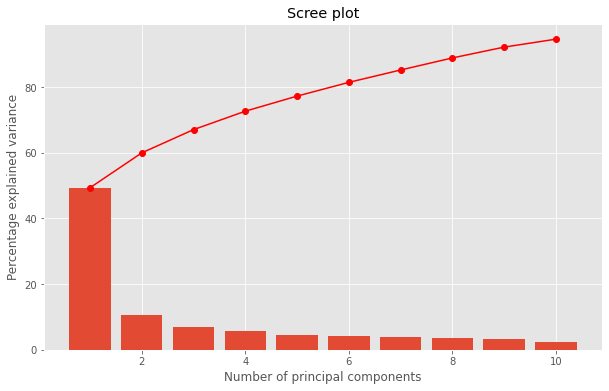

In [37]:
pca = pipeline.named_steps['PCA']
exp_var_pca = pca.explained_variance_ratio_
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    fig, ax = plt.subplots(figsize=(10,6)) 
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)
display_scree_plot(pca) 

## Cuantos Clusters?

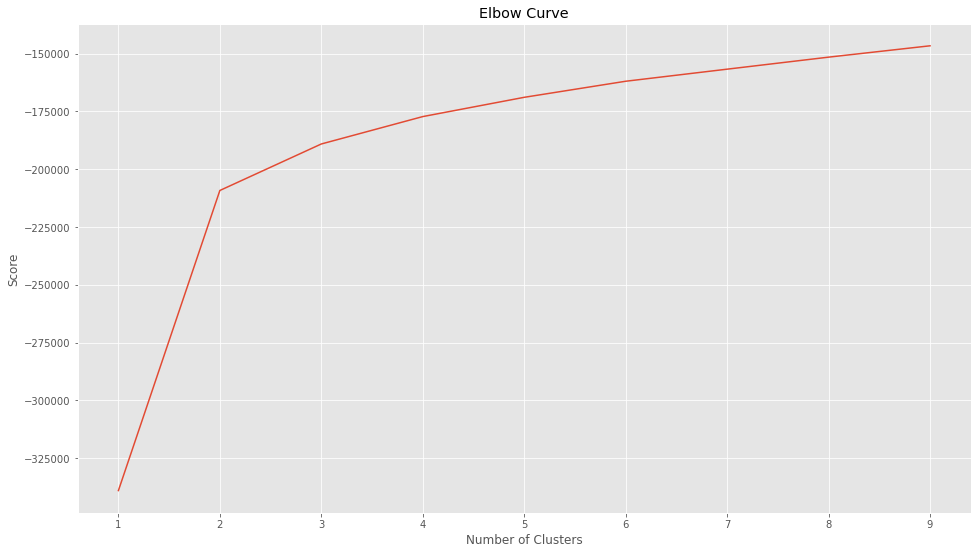

In [38]:
df_pr = preprocessor.fit_transform(df[columnas])
k = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in k]
score = [kmeans[i].fit(df_pr).score(df_pr) for i in range(len(kmeans))]
score
plt.plot(k,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## Como se ven los clusters?

/Users/nsantilli/opt/anaconda3/envs/spyder-dev/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:900: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/nsantilli/opt/anaconda3/envs/spyder-dev/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:902: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


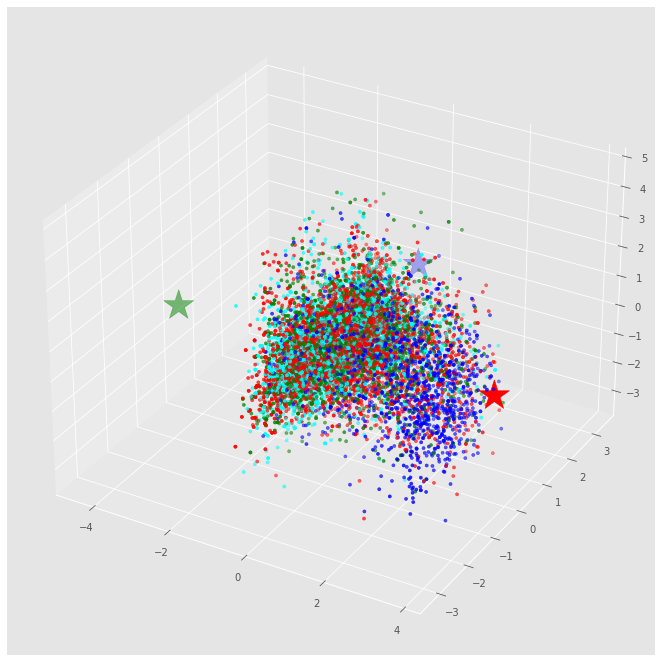

In [39]:
km = pipeline.named_steps['K-Means']
labels = km.labels_
C = km.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(df_pr[:, 0], df_pr[:, 1], df_pr[:, 2], c=asignar,s=10)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3],marker='*', c=colores, s=1000)
plt.show()

## Componentes principales

<AxesSubplot:>

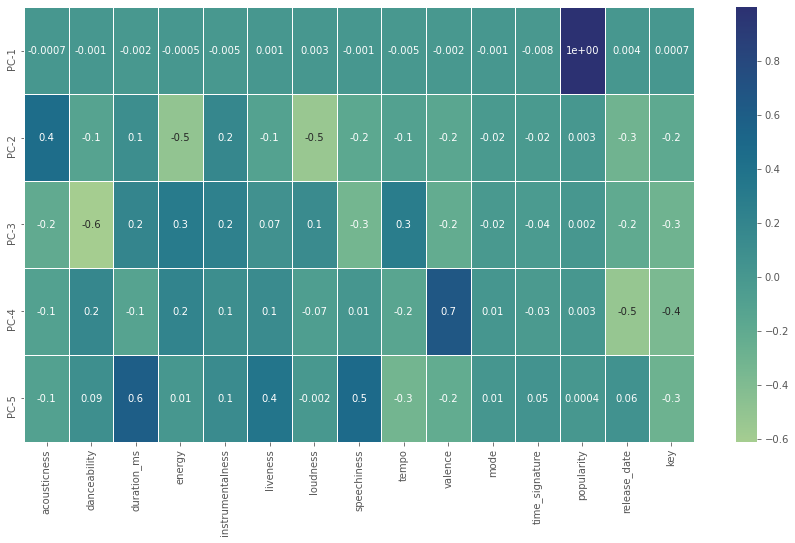

In [40]:
columnas = (numeric_features + categorical_features)
n_comp = 10
pc_comp=[]
for c in range(1,n_comp+1):
    pc_comp.append(f'PC-{c}')
df_plot = pd.DataFrame(pca.components_,columns=df[columnas].columns, index = pc_comp).head()
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(df_plot, annot=True, fmt=".1", linewidth=.5, cmap='crest')


## UMAP
https://umap-learn.readthedocs.io/en/latest/index.html

- Understanding: https://pair-code.github.io/understanding-umap/

- Paper: https://arxiv.org/abs/1802.03426

- Visualizaciones:
    - https://observablehq.com/@stwind/exploring-fashion-mnist
    - https://projector.tensorflow.org

## Diferencias con T-sne
- tSNE no escala bien para tamaños de muestra que aumentan rápidamente
- No conserva la estructura de datos globales, lo que significa que solo las distancias dentro de los clústeres son significativas, mientras que las similitudes entre los clústeres no están garantizadas.
- tSNE realiza un mapeo no paramétrico de dimensiones altas a bajas, lo que significa que no aprovecha las características que impulsan la agrupación observada. 
- tSNE no puede trabajar con datos de alta dimensión directamente, Autoencoder o PCA se usan a menudo para realizar una reducción de predimensionalidad antes de conectarlo 
- consume demasiada memoria para sus cálculo

## UMAP

- Usa distribución de probabilidad exponencial en dimensiones altas, pero no necesariamente distancias euclidianas como tSNE, sino que se puede conectar cualquier distancia. 
![umap](img/umap_f.png)

- No aplica la normalización a las probabilidades de dimensiones altas o bajas, lo cual es muy diferente de tSNE
- UMAP utiliza el número de vecinos más cercanos en lugar de la perplejidad.
- Modela probabilidades de distancia en dimensiones bajas
- Utiliza binary cross-entropy (CE) como función de costo, para capturar la estructura de datos global 
- Utiliza Stochastic Gradient Descent (SGD) 

Ventajas
- Mantiene estructura local y global de los datos
- Escala optimamente a mayor cantidad de datos
- Es mas veloz su convergencia

https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668#:~:text=3%20in%20the-,UMAP%20paper,-.%20Otherwise%2C%20I%20do

In [41]:
df_pr = preprocessor.fit_transform(df[columnas])

## Definimos funcion para tunear hiperparametros

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["genre"]])
target = enc.transform(df[["genre"]])
seed = 32
def tuning_umap(n_neighbors=15, min_dist=0.1, n_components=3, metric='correlation', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state=seed
    )
    u = fit.fit_transform(df_pr, target)
    return u

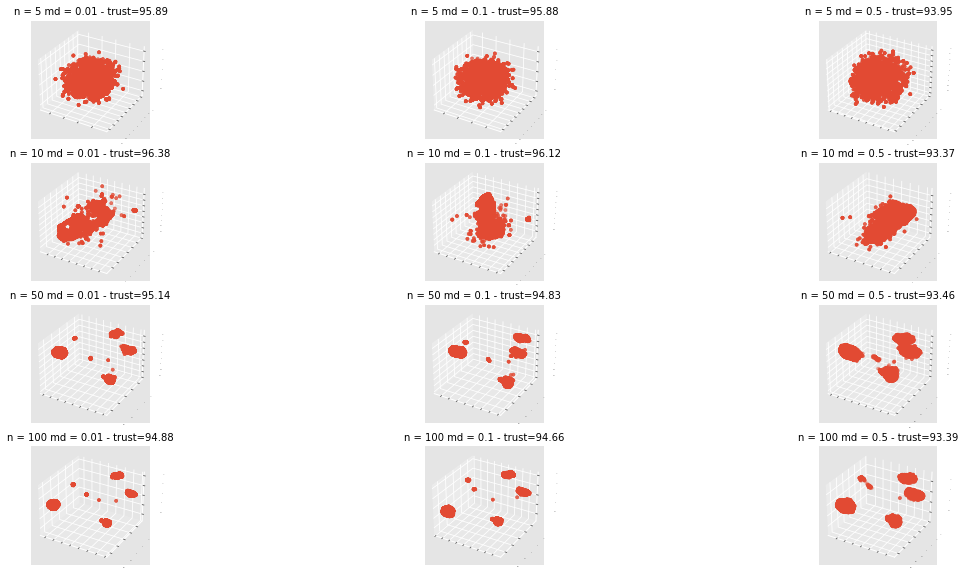

In [43]:
n_neighbors = [5, 10, 50, 100]
min_dist = [0.01, 0.1, 0.5]
fig = plt.figure(figsize=(20, 10))
i = 0
for n in n_neighbors:
    for d in min_dist:
            u = tuning_umap(n_neighbors=n, min_dist=d, metric="cosine", title='n_neighbors = {} dist = {}'.format(n, d))
            trust = sklearn.manifold.trustworthiness(df_pr, u)
            #print('n_neighbors = {} dist = {}'.format(n, d) + ' - trust=' + str(trust))
            ax = fig.add_subplot(len(n_neighbors), len(min_dist), i+1, projection='3d')
            ax.scatter(u[:,0], u[:,1], u[:,2], s=10)
            ax.set_title('n = {} md = {}'.format(n, d) + ' - trust=' + str(round(trust*100,2)), fontsize=10)
            ax.tick_params(axis='both', bottom=False, top=False, labelbottom=False, left='off', right='off', labelleft='off', labelsize=1)
            i = i+1
plt.show()

In [52]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=3, metric='cosine', verbose = 2, n_epochs = 500, random_state=seed)
embedding = reducer.fit_transform(df_pr, target)

UMAP(angular_rp_forest=True, dens_frac=0.0, dens_lambda=0.0, metric='cosine',
     n_components=3, n_epochs=500, n_neighbors=50, random_state=32, verbose=2)
Construct fuzzy simplicial set
Sun Nov 13 17:59:56 2022 Finding Nearest Neighbors
Sun Nov 13 17:59:56 2022 Building RP forest with 11 trees
Sun Nov 13 17:59:56 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Sun Nov 13 17:59:57 2022 Finished Nearest Neighbor Search
Sun Nov 13 17:59:58 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Nov 13 18:00:21 2022 Finished embedding


In [53]:
import plotly.express as px


fig_3d = px.scatter_3d(
    embedding, x=0, y=1, z=2,
    color=df.genre, labels={'color': 'genre'},
    width=800, height=800
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()

## Clustering: DBSCAN

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- https://scikit-learn.org/0.15/auto_examples/cluster/plot_cluster_comparison.html
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

![dbscan](img/dbscan.png)



In [46]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [47]:
%%time
#Pasamos una lista de eps y min_samples para correr DBSCAN
range_eps = [0.1, 2, 5, 10]
min_samples = [10, 50, 100]
for i in range_eps:
    for ms in min_samples:
        print("eps"+str(i)+" - min_samples"+str(ms))
        db = DBSCAN(eps=i, min_samples=ms).fit(embedding)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        n_noise_ = list(labels).count(-1)
        print("cluster: " + str(len(set(labels))) + " and noise: " + str(n_noise_))
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(embedding, labels)
        else:
            silhouette_avg = 0
            pass
        print("For eps= " +str(i) + " and min_samples= " + str(ms), "The avg score:", silhouette_avg)
        print("--------------------------------------")

eps0.1 - min_samples10
cluster: 138 and noise: 10442
For eps= 0.1 and min_samples= 10 The avg score: -0.5804137
--------------------------------------
eps0.1 - min_samples50
cluster: 1 and noise: 13966
For eps= 0.1 and min_samples= 50 The avg score: 0
--------------------------------------
eps0.1 - min_samples100
cluster: 1 and noise: 13966
For eps= 0.1 and min_samples= 100 The avg score: 0
--------------------------------------
eps2 - min_samples10
cluster: 7 and noise: 3
For eps= 2 and min_samples= 10 The avg score: 0.8009106
--------------------------------------
eps2 - min_samples50
cluster: 7 and noise: 3
For eps= 2 and min_samples= 50 The avg score: 0.8009106
--------------------------------------
eps2 - min_samples100
cluster: 6 and noise: 90
For eps= 2 and min_samples= 100 The avg score: 0.80695903
--------------------------------------
eps5 - min_samples10
cluster: 6 and noise: 3
For eps= 5 and min_samples= 10 The avg score: 0.7650405
--------------------------------------
eps

## Ejecutamos la version seleccionada

In [48]:
db = DBSCAN(eps=2, min_samples=100).fit(embedding)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)
#Evaluate
df_histo = pd.DataFrame(embedding, columns =['x1', 'x2', 'x3'], dtype = float)
df_histo['cluster'] = list(map(str,labels))
df_histo['genre'] = df.genre.values
#df_histo = df_histo.loc[df_histo.cluster!='-1',:]

{0, 1, 2, 3, 4, -1}


## Matriz de Precision

<AxesSubplot:xlabel='genre', ylabel='cluster'>

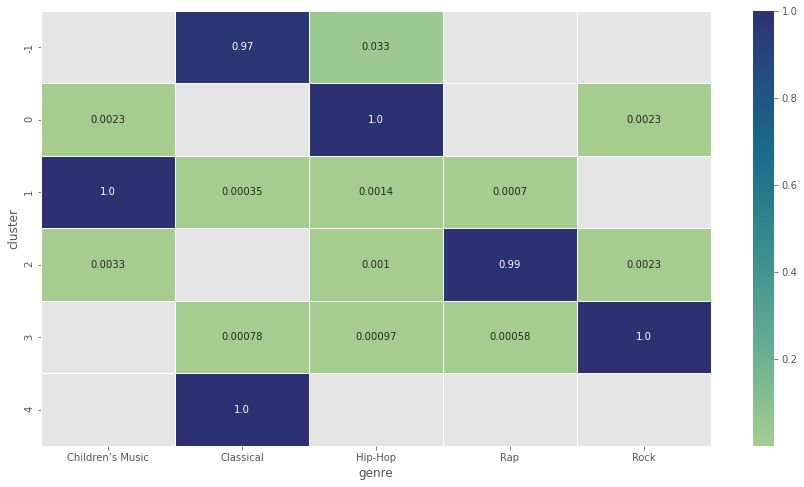

In [49]:
matriz = df_histo.groupby(['cluster', 'genre']).x1.count().reset_index()
matriz['perc'] = matriz['x1'] / matriz.groupby('cluster')['x1'].transform('sum')
matriz = pd.pivot_table(matriz, values='perc', index=['cluster'], columns=['genre'], aggfunc=np.mean)
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(matriz, annot=True, fmt=".2", linewidth=.5, cmap='crest')

## Evaluacion de rendimiento

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [50]:
df_histo['label'] = np.where(df_histo.genre=='Hip-Hop', 0,
                        np.where(df_histo.genre=='Children’s Music', 1,
                        np.where(df_histo.genre=='Rap', 2,
                        np.where(df_histo.genre=='Rock', 3,
                        np.where(df_histo.genre=='Classical', 4, -1
                        )))))

## Indice de Rand

Metrica de similaridad de las asignaciones ajustado por la aleatoriedad

$ \text{RI} = \frac{a + b}{C_2^{n_{samples}}} $

- a: el número de pares de elementos que están en el mismo conjunto en C y en el mismo conjunto en K
- b: el número de pares de elementos que están en diferentes conjuntos en C y en diferentes conjuntos en K
- C: número total de pares posibles en el conjunto de datos.

$ \text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]} $

Para contrarrestar este efecto, podemos descontar el RI esperado $ E[\text{RI}] $ de etiquetas aleatorias definiendo el índice de Rand ajustado de la siguiente manera:

In [55]:
from sklearn import metrics
metrics.adjusted_rand_score(df_histo.label, df_histo.cluster)

0.9903583363843917

## Homogeneidad e Integridad

- Homogeneidad: cada grupo contiene solo miembros de una sola clase.
- Integridad: todos los miembros de una clase determinada se asignan al mismo grupo.

$ v = \frac{(1 + \beta) \times \text{homogeneity} \times \text{completeness}}{(\beta \times \text{homogeneity} + \text{completeness})} $

Parametro beto
- usar un valor inferior a 1 para atribuirá más peso a la homogeneidad
- utilizando un valor mayor que 1 se atribuirá más peso a la integridad.

In [57]:
metrics.v_measure_score(df_histo.label, df_histo.cluster, beta=0.6)

0.9769091583175801

In [58]:
metrics.v_measure_score(df_histo.label, df_histo.cluster, beta=1.6)

0.9747366949072918

## Silhouette Coefficient

$ s = \frac{b - a}{max(a, b)} $

- a: La distancia media entre una muestra y todos los demás puntos de la misma clase.
- b: La distancia media entre una muestra y todos los demás puntos en el siguiente grupo más cercano.

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [59]:
sample_silhouette_values = silhouette_samples(embedding, labels)
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': labels})
res_sil.sil_value.mean()

0.8069596290588379

In [60]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,0.936714
0,0.785061
1,0.850906
2,0.768289
3,0.806927
4,0.962913


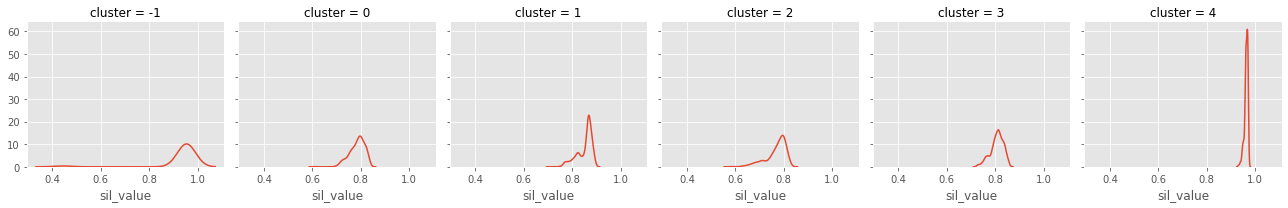

In [61]:
g = sns.FacetGrid(res_sil, col='cluster')
g = g.map(sns.kdeplot, 'sil_value')

## Índice Davies-Bouldin

$ R_{ij} = \frac{s_i + s_j}{d_{ij}} $

- $ s_{ij} $ = la distancia media entre cada punto del grupo i y el centroide
- $ d_{ij} $ la distancia entre los centróides 

$ DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij} $

In [62]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(embedding, labels)

0.21538339261018438

## Features por genero

In [63]:
features_sel=['acousticness','popularity', 'speechiness',
          'duration_ms','valence'
       ]

df_mean_sc = pd.DataFrame(data=df_pr, columns=columnas)
df_mean_sc['cluster'] = labels
df_mean_sc['genre'] = df.genre.values
df_mean_sc = df_mean_sc[features_sel + ['cluster']]


### Recordemos
- 0 : Hip-Hop
- 1 : Children's music
- 2 : Rap
- 3 : Rock
- 4 : Clasica

In [64]:
df_mean_cl = df_mean_sc.groupby(['cluster']).median()[features_sel]
df_mean_cl = df_mean_cl.reset_index()
df_mean_cl = pd.melt(df_mean_cl, id_vars =['cluster'], value_vars =features_sel)

fig = px.line(df_mean_cl, x='variable' ,y='value',  color='cluster')
fig.show()

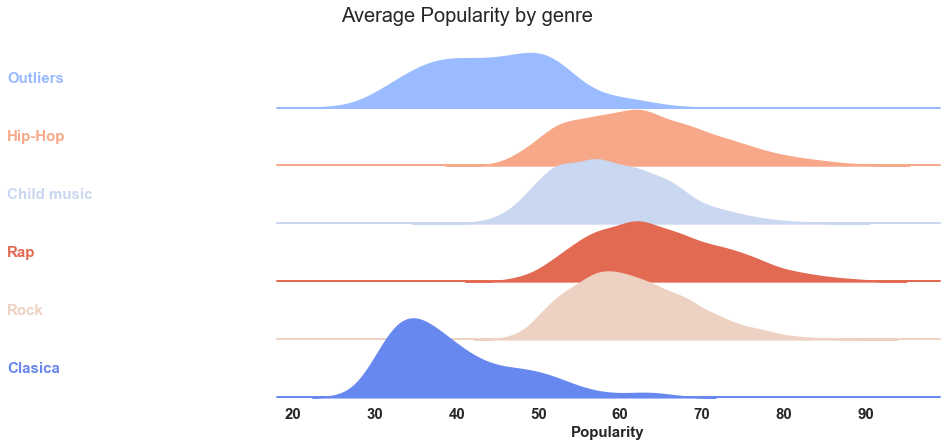

In [65]:
features_sel=['acousticness','popularity', 'speechiness',
          'duration_ms','valence'
       ]

df_mean_sc = pd.DataFrame(data=df, columns=columnas)
df_mean_sc['cluster'] = labels
df_mean_sc['genre'] = df.genre.values
df_mean_sc = df_mean_sc[features_sel + ['cluster']]

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we define a dictionnary with months that we'll use later
genre_dict = {1: 'Outliers',
              2: 'Hip-Hop',
              3: 'Child music',
              4: 'Rap',
              5: 'Rock',
              6: 'Clasica'}
              
# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
cluster_mean_serie = df_mean_sc.groupby('cluster')['popularity'].mean()
df_mean_sc['mean_cluster'] = df_mean_sc['cluster'].map(cluster_mean_serie)

# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=6)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df_mean_sc, row='cluster', hue='mean_cluster', aspect=10, height=1, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'popularity',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, genre_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Popularity', fontweight='bold', fontsize=15)
g.fig.suptitle('Average Popularity by genre',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()

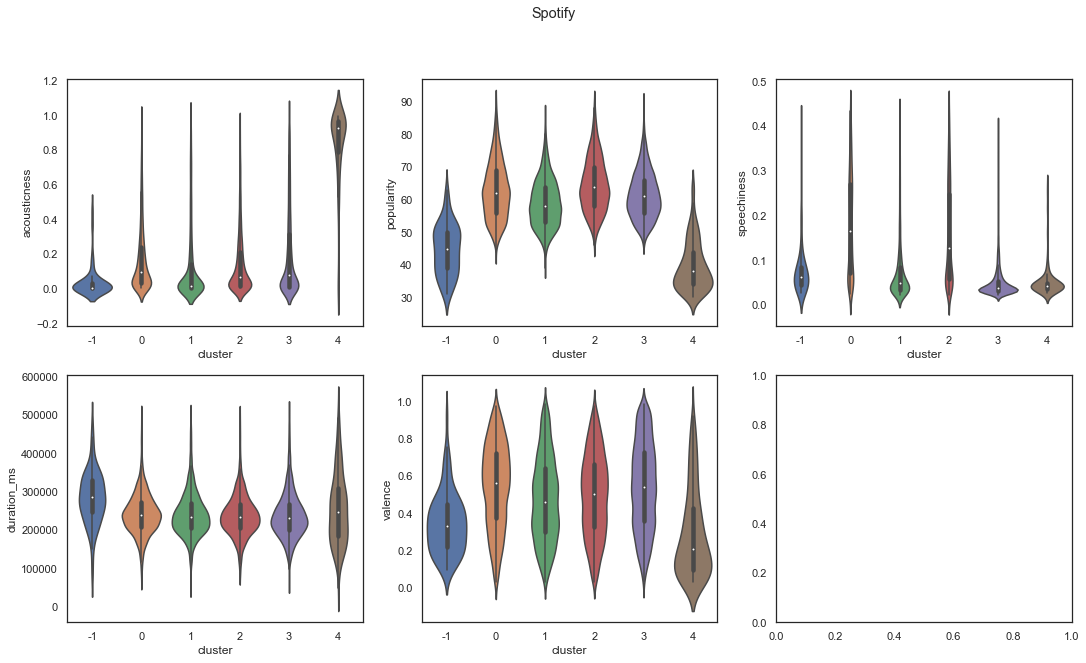

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Spotify')
x=0
y=0
for c in features_sel:
    if y > 2:
        x = x +1
        y = 0
    else:
        x
    sns.violinplot(ax=axes[x, y], x=df_mean_sc["cluster"], y=df_mean_sc[c])
    y= y + 1
    
    

## Revisemos algunos casos

In [67]:
df_pred = df.copy()
df_pred['cluster_pred'] = labels
df_pred['cluster_genero'] = df_histo['label'].values
df_pred['cluster_pred_ds'] = np.where(df_pred['cluster_pred'] == 0, 'Hip_Hop',
                            np.where(df_pred['cluster_pred'] == 1, 'Children',
                            np.where(df_pred['cluster_pred'] == 2, 'Rap',
                            np.where(df_pred['cluster_pred'] == 3, 'Rock',
                            np.where(df_pred['cluster_pred'] == 4, 'Clasica',
                            np.where(df_pred['cluster_pred'] == -1, 'Outlier', ''))))))

In [68]:
from pySankey.sankey import sankey

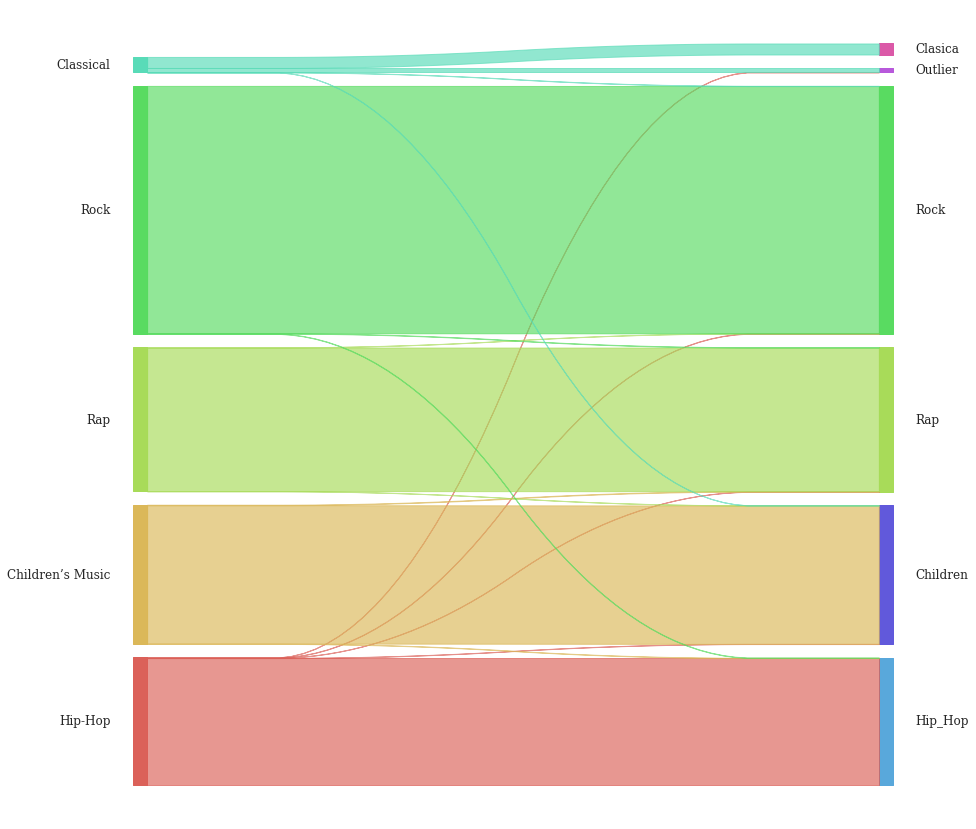

In [69]:
sankey(df_pred['genre'], df_pred['cluster_pred_ds'], aspect=50,  fontsize=12)
# Set size in inches
# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(15, 15)


In [70]:
df_pred[(df_pred.cluster_genero != df_pred.cluster_pred) &  (df_pred.cluster_pred != -1)][['genre', 'artist_name', 'track_name', 'cluster_genero', 'cluster_pred', 'cluster_pred_ds']].head()

,genre,artist_name,track_name,cluster_genero,cluster_pred,cluster_pred_ds
270,Children’s Music,Joji,CAN'T GET OVER YOU (feat. Clams Casino),1,2,Rap
560,Hip-Hop,Rage Against The Machine,Killing In The Name,0,2,Rap
561,Children’s Music,Rage Against The Machine,Killing In The Name,1,2,Rap
563,Rock,Rage Against The Machine,Killing In The Name,3,2,Rap
615,Children’s Music,GoldLink,Crew (feat. Brent Faiyaz & Shy Glizzy),1,2,Rap


### Como clasifican los outliers?

In [71]:
df_pred[(df_pred.cluster_genero != df_pred.cluster_pred) &  (df_pred.cluster_pred == -1)].genre.value_counts()

Classical    87
Hip-Hop       3
Name: genre, dtype: int64

In [72]:
df_pred[(df_pred.cluster_genero != df_pred.cluster_pred) &  (df_pred.cluster_pred == -1)][['genre', 'artist_name', 'track_name', 'cluster_genero', 'cluster_pred', 'cluster_pred_ds']]

,genre,artist_name,track_name,cluster_genero,cluster_pred,cluster_pred_ds
5982,Hip-Hop,Gorillaz,Broken,0,-1,Outlier
15721,Hip-Hop,Soulja Boy,Turn My Swag On,0,-1,Outlier
32573,Hip-Hop,lil aaron,DRUGS,0,-1,Outlier
36774,Classical,DragonForce,Through The Fire And Flames,4,-1,Outlier
36842,Classical,Queensrÿche,Silent Lucidity - Remastered/2003,4,-1,Outlier
...,...,...,...,...,...,...
40340,Classical,Joe Satriani,I Believe,4,-1,Outlier
46272,Classical,Angra,Nova Era,4,-1,Outlier
46275,Classical,Michael Schenker Group,Assault Attack - 2009 Remaster,4,-1,Outlier
46279,Classical,Iced Earth,Burning Times - Remixed & Remastered,4,-1,Outlier


In [76]:
df_pred[(df_pred.cluster_genero != df_pred.cluster_pred) &  (df_pred.cluster_pred == -1)][['genre', 'artist_name', 'track_name', 'cluster_genero', 'cluster_pred', 'cluster_pred_ds']].artist_name.value_counts().head()

Queensrÿche       19
David Lee Roth     7
Iced Earth         5
Mr. Big            4
Kamelot            4
Name: artist_name, dtype: int64

In [75]:
df_pred[(df_pred.cluster_genero == df_pred.cluster_pred) &  (df_pred.cluster_pred_ds == 'Clasica')][['genre', 'artist_name', 'track_name', 'cluster_genero', 'cluster_pred', 'cluster_pred_ds']].artist_name.value_counts().head()

Leonard Bernstein          18
Wolfgang Amadeus Mozart    16
Antônio Carlos Jobim       16
Giacomo Puccini            15
Antonio Vivaldi            14
Name: artist_name, dtype: int64

In [74]:

fig_3d = px.scatter_3d(
    embedding, x=0, y=1, z=2,
    color=df_pred.cluster_pred_ds, labels={'color': 'genre'},
    width=800, height=800
)
fig_3d.update_traces(marker_size=5)

fig_3d.show()

## Alguna de las aplicaciones

- Segmentar casos en base a características de las que desconocemos categorías
- Segmentar casos cuando tenemos certeza parcial de la categorias
- Revisar los labels de la segmentación que disponemos
- Realizar subcategorias mas especificas a las existentes
- Detectar Outliers